<a href="https://colab.research.google.com/github/venkatesh58285/ML/blob/main/Lab7_AP23110011217.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install gdown

# Download dataset from Google Drive
!gdown 1ZdhRqYv-JizWV6DxO6C4R_k1kxPhmlF2



Downloading...
From: https://drive.google.com/uc?id=1ZdhRqYv-JizWV6DxO6C4R_k1kxPhmlF2
To: /content/multiclass.csv
100% 14.6k/14.6k [00:00<00:00, 42.6MB/s]


**Loading Data Set**

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

df = pd.read_csv("multiclass.csv")
print(df.head());


   Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen  class
0       3  12669  9656     7561     214              2674        1338      2
1       3   7057  9810     9568    1762              3293        1776      2
2       3   6353  8808     7684    2405              3516        7844      2
3       3  13265  1196     4221    6404               507        1788      1
4       3  22615  5410     7198    3915              1777        5185      1


**Data Preprocessin**

->Removing Null Values

->Smote

->Scaling

Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
class               0
dtype: int64
Target distribution:
class
2    180
3    173
1     87
Name: count, dtype: int64


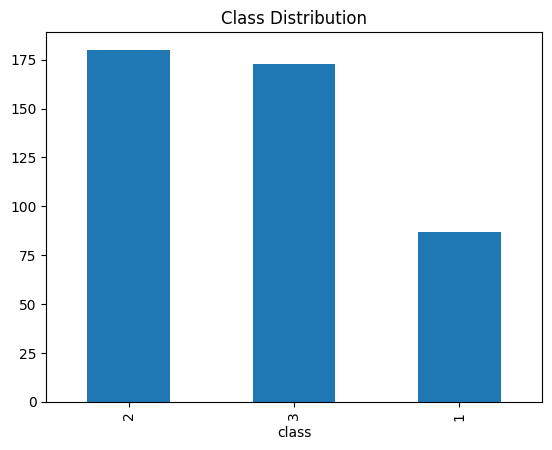

Before SMOTE: class
2    180
3    173
1     87
Name: count, dtype: int64
After SMOTE: class
2    180
1    180
3    180
Name: count, dtype: int64
Scaled features shape: (540, 7)


In [15]:
print(df.isnull().sum())
df = df.dropna()
print("Target distribution:")
print(df['class'].value_counts())

# Plot
df['class'].value_counts().plot(kind='bar')
plt.title("Class Distribution")
plt.show()
X = df.drop("class", axis=1)
y = df["class"]

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

print("Before SMOTE:", y.value_counts())
print("After SMOTE:", pd.Series(y_res).value_counts())

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_res)

print("Scaled features shape:", X_scaled.shape)



**Train Test Split**

In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_res, test_size=0.2, random_state=42
)

print("Train size:", X_train.shape)
print("Test size:", X_test.shape)


Train size: (432, 7)
Test size: (108, 7)


**KNN Scratch Implementation**

In [18]:
import numpy as np
from collections import Counter

class KNN_Scratch:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = np.array(X)
        self.y_train = np.array(y)

    def predict(self, X):
        predictions = [self._predict(x) for x in X]
        return np.array(predictions)

    def _predict(self, x):

        distances = [np.sqrt(np.sum((x - x_train) ** 2)) for x_train in self.X_train]

        k_idx = np.argsort(distances)[:self.k]

        k_neighbor_labels = [self.y_train[i] for i in k_idx]

        most_common = Counter(k_neighbor_labels).most_common(1)
        return most_common[0][0]


**Evaluating**

In [19]:
from sklearn.metrics import accuracy_score

knn_scratch = KNN_Scratch(k=3)
knn_scratch.fit(X_train, y_train)

y_pred_scratch = knn_scratch.predict(X_test)

print("Scratch KNN Accuracy:", accuracy_score(y_test, y_pred_scratch))


Scratch KNN Accuracy: 0.8518518518518519


**KNN using scikit learn**